In [13]:
import pandas as pd
import seaborn as sns
import spacy

things to do:
- summary data of how many reviews from which branch
- reviewer location (how many from Singapore)
- what year-month are the reviews from
- what is the general ratings for each branch

In [3]:
original = pd.read_csv("data/DisneylandReviews.csv", encoding='latin1')
df = original.copy()
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df['Branch'] = df['Branch'].astype('category')
df["Year_Month"] = pd.to_datetime(df["Year_Month"], format="%Y-%m", errors = "coerce")
df["Reviewer_Location"] = df["Reviewer_Location"].astype('category')
df = df.rename(columns={
    "Reviewer_Location" : "Location"
})
df

,Review_ID,Rating,Year_Month,Location,Review_Text,Branch
0,670772142,4,2019-04-01,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-05-01,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-04-01,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-04-01,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-04-01,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,NaT,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,NaT,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,NaT,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,NaT,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [15]:
location = df.groupby("Location").count().sort_values(by="Review_ID", ascending=False)
sg_percentage = location.count()/df[df.Location == "Singapore"].count()*100
sg_percentage.Review_Text
# Find total Singapore reviews
sg_reviews = df[df.Location == "Singapore"].shape[0]
total_reviews = df.shape[0]
sg_percentage = (sg_reviews / total_reviews) * 100

print(f"Singapore reviews: {sg_reviews} out of {total_reviews} ({sg_percentage:.2f}%)")
# Get top 10 locations by review count

top10_locations = location.head(10)
top10_locations['Percentage'] = (top10_locations['Review_ID'] / total_reviews) * 100
top10_locations


Singapore reviews: 1037 out of 42656 (2.43%)


/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2875215470.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  location = df.groupby("Location").count().sort_values(by="Review_ID", ascending=False)
/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2875215470.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_locations['Percentage'] = (top10_locations['Review_ID'] / total_reviews) * 100


,Review_ID,Rating,Year_Month,Review_Text,Branch,Percentage
Location,,,,,,
United States,14551,14551,13522,14551,14551,34.112434
United Kingdom,9751,9751,9115,9751,9751,22.859621
Australia,4679,4679,4412,4679,4679,10.969149
Canada,2235,2235,2116,2235,2235,5.239591
India,1511,1511,1470,1511,1511,3.542292
Philippines,1070,1070,1024,1070,1070,2.508440
Singapore,1037,1037,971,1037,1037,2.431077
New Zealand,756,756,714,756,756,1.772318
Malaysia,588,588,562,588,588,1.378470


Singapore reviews: 1037 out of 42656 (2.43%) - country with the 7th highest number of reviews.

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2165113529.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_ratings = df.groupby('Branch')['Rating'].agg(['mean', 'count', 'std'])


Average Ratings by Branch:
                  Branch      mean  count       std
0  Disneyland_California  4.405339  19406  0.975600
1    Disneyland_HongKong  4.204158   9620  0.932989
2       Disneyland_Paris  3.960088  13630  1.205324


/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2165113529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x='Branch', y='mean', data=branch_ratings, palette='viridis')


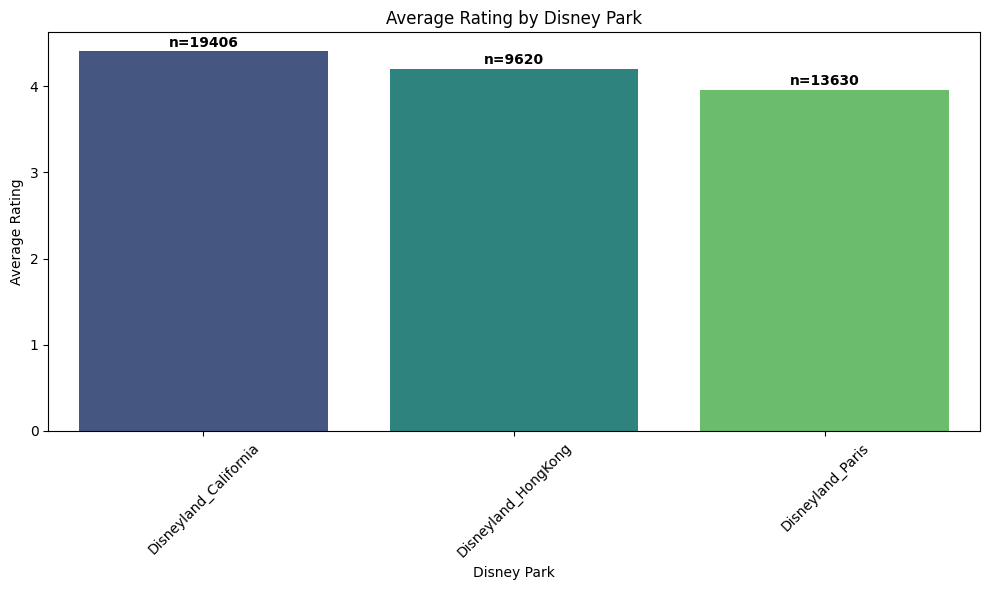

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/2165113529.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Branch', y='Rating', data=df, palette='viridis')


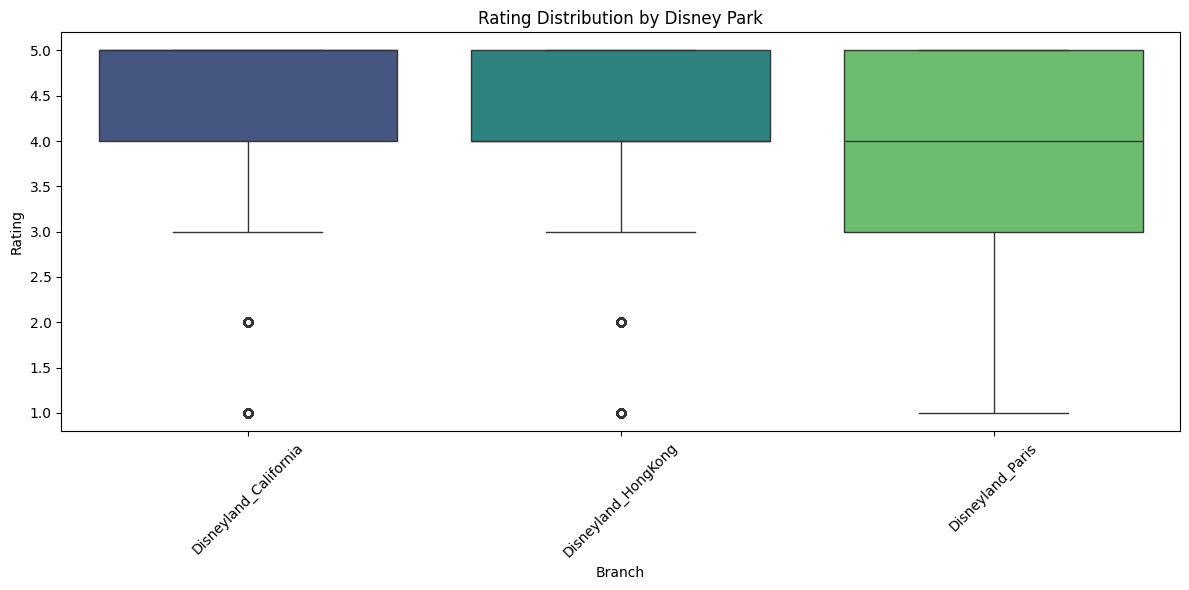

In [ ]:
# ratings distribution
branch_ratings = df.groupby('Branch')['Rating'].agg(['mean', 'count', 'std'])
branch_ratings = branch_ratings.sort_values(by='mean', ascending=False)
branch_ratings = branch_ratings.reset_index()

print("Average Ratings by Branch:")
print(branch_ratings)

# ratings by branch
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sb.barplot(x='Branch', y='mean', data=branch_ratings, palette='viridis')
plt.title('Average Rating by Disney Park')
plt.ylabel('Average Rating')
plt.xlabel('Disney Park')
plt.xticks(rotation=45)

for i, row in enumerate(branch_ratings.itertuples()):
    ax.text(i, row.mean + 0.05, f'n={row.count}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# rating distribution
plt.figure(figsize=(12, 6))
sb.boxplot(x='Branch', y='Rating', data=df, palette='viridis')
plt.title('Rating Distribution by Disney Park')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/1794418310.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  branch_word_counts = df.groupby('Branch')['word_count'].agg(['mean', 'median', 'min', 'max', 'count'])
/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/1794418310.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Branch', y='word_count', data=df, palette='viridis')


Average Word Count per Review by Branch:
                             mean  median  min   max  count
Branch                                                     
Disneyland_Paris       169.369773   112.0    3  3963  13630
Disneyland_California  115.449036    71.0    7  3527  19406
Disneyland_HongKong    102.259044    70.0    6  1591   9620

Overall average word count across all reviews: 129.70 words


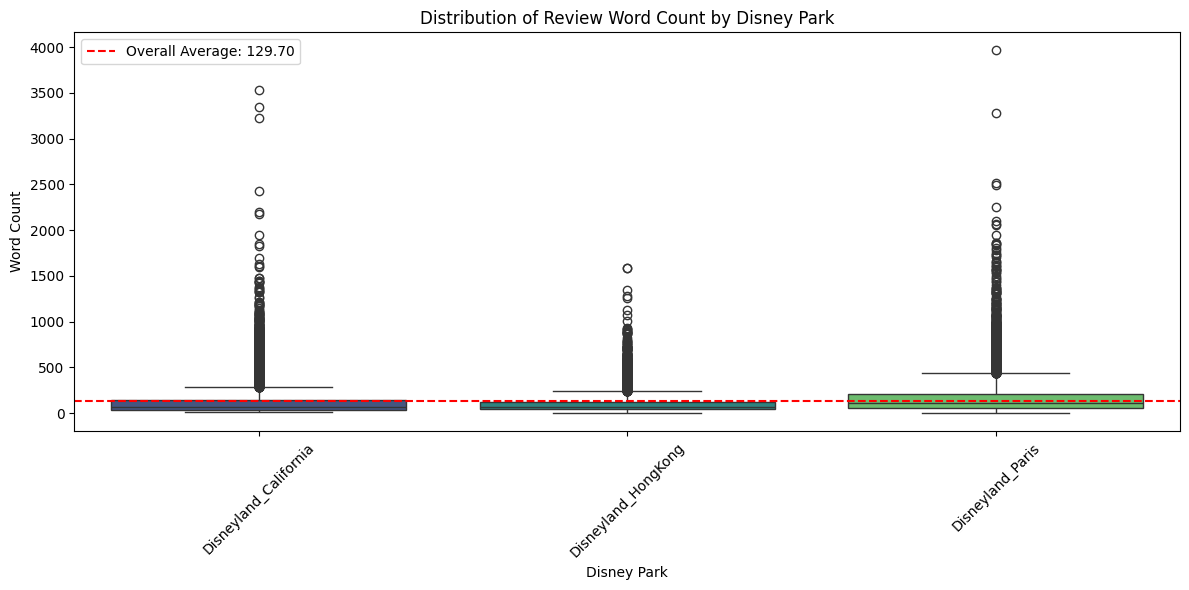

/var/folders/4k/8zjs5w191wn6mjqcxkws37dw0000gn/T/ipykernel_81595/1794418310.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Branch')


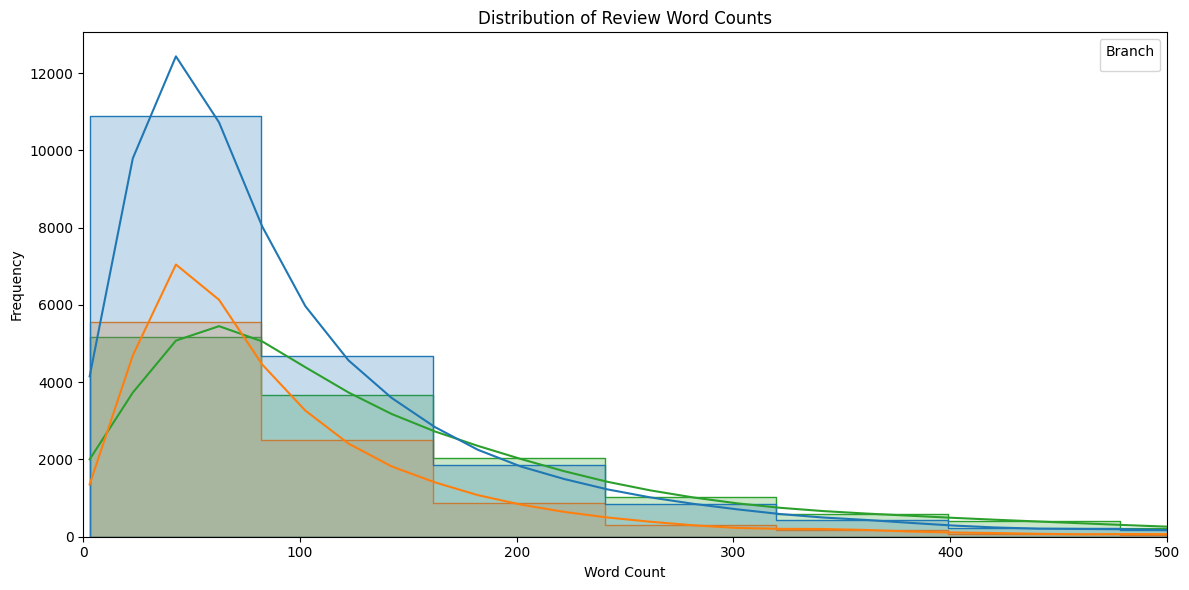

In [17]:
# Calculate the word count for each review
df['word_count'] = df['Review_Text'].str.split().str.len()

# Calculate average word count per review for each branch
branch_word_counts = df.groupby('Branch')['word_count'].agg(['mean', 'median', 'min', 'max', 'count'])
branch_word_counts = branch_word_counts.sort_values(by='mean', ascending=False)

# Display summary statistics
print("Average Word Count per Review by Branch:")
print(branch_word_counts)

# Overall average
overall_avg = df['word_count'].mean()
print(f"\nOverall average word count across all reviews: {overall_avg:.2f} words")

# Visualize the distribution
plt.figure(figsize=(12, 6))
sb.boxplot(x='Branch', y='word_count', data=df, palette='viridis')
plt.title('Distribution of Review Word Count by Disney Park')
plt.ylabel('Word Count')
plt.xlabel('Disney Park')
plt.xticks(rotation=45)
plt.axhline(overall_avg, color='red', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Word count distribution histogram
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='Branch', bins=50, kde=True, element='step')
plt.title('Distribution of Review Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 500)  # Limiting x-axis to better visualize the common range
plt.legend(title='Branch')
plt.tight_layout()
plt.show()